<a href="https://colab.research.google.com/github/danielasenraoka/music_evolution/blob/main/exploratory_anaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import modules

In [192]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns

# Load data

Hay 3 sets de datos distintos, uno separado por décadas desde 1950 hasta 2010, otro anual desde 1921 hasta 2020 y otro anual con clasificación de géneros.

In [200]:
df1950 = pd.read_csv('https://drive.google.com/uc?id=1noqg-775SO0v40hrgTtGsp1GOxivHZ6n')
df1960 = pd.read_csv('https://drive.google.com/uc?id=1f6liQlLGSttkfnbRmOOKewvWqbdwbXfQ')
df1970 = pd.read_csv('https://drive.google.com/uc?id=1Jg2CudFnNec1XjJCDqrn36yfqlUbq_vs')
df1980 = pd.read_csv('https://drive.google.com/uc?id=1hUBBrAvJ1TTEv6DX6C8jKIEKov0K0bt2')
df1990 = pd.read_csv('https://drive.google.com/uc?id=1ESVRKbOtHBTP0Xb4AS18fj_gVkjyZD0O')
df2000 = pd.read_csv('https://drive.google.com/uc?id=1b27bWLmepXYmbDNfQ6XIqBt2t3Eu2w4h')
df2010 = pd.read_csv('https://drive.google.com/uc?id=1uMLElUSFgFUh4r68Bia_sNo29lUJDwY8')

#df1921_2020 = pd.read_csv('https://drive.google.com/uc?id=1WDwMPhvSGxKgyfKNLBm5o0dEXjBvJdIC')

# Los dataset anteriores tienen algunos géneros atípicos
# Agregamos este dataset para buscar los géneros que nos falten en ciertas canciones: 
# https://data.mendeley.com/datasets/3t9vbwxgr5/2/files/d2c58546-d8be-4d57-af14-b61337c927b2
df_genre = pd.read_csv('https://drive.google.com/uc?id=14r8pyBecJyFeGd0Dxky6H1KEM5JqY0l2') 


# Dataset separado por décadas

In [201]:
df1950.head()

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72
1,2,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,3,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61
3,4,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60
4,5,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60


In [202]:
decades = ["1950", "1960", "1970", "1980", "1990", "2000", "2010"]

In [203]:
for decade in decades:
  #lo llevo a /100 porque estaba porcentual, en la API están con un score de 0 a 1
  eval("df"+decade)['nrgy'] = eval("df"+decade)['nrgy']/100
  eval("df"+decade)['dnce'] = eval("df"+decade)['dnce']/100
  eval("df"+decade)['live'] = eval("df"+decade)['live']/100
  eval("df"+decade)['val'] = eval("df"+decade)['val']/100
  eval("df"+decade)['acous'] = eval("df"+decade)['acous']/100
  eval("df"+decade)['spch'] = eval("df"+decade)['spch']/100

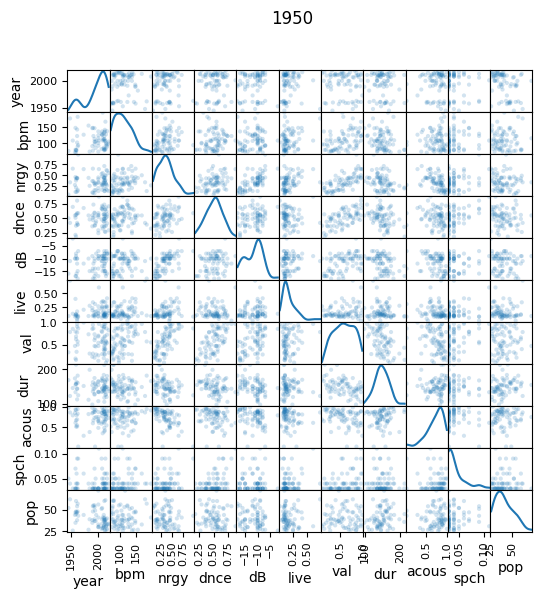

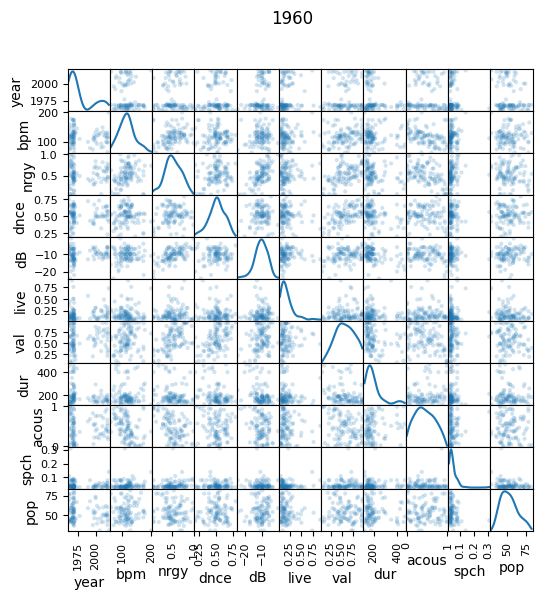

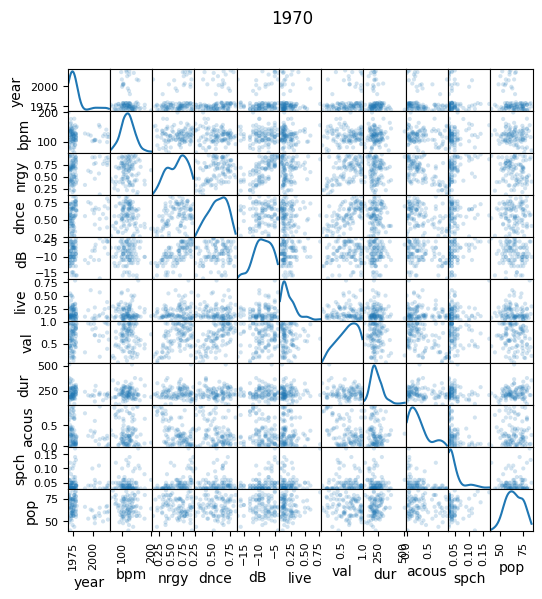

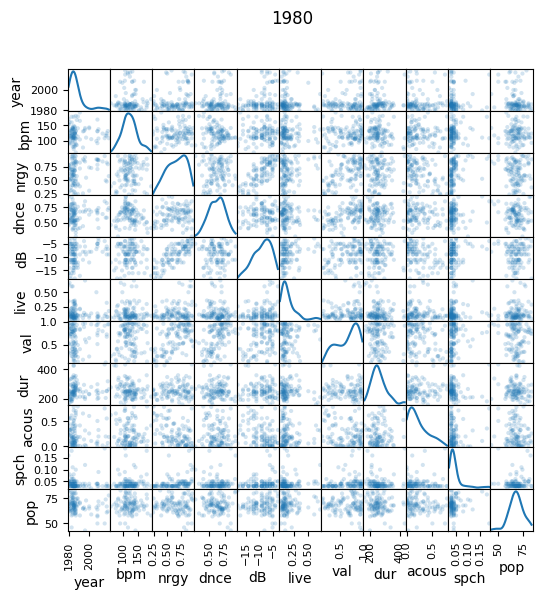

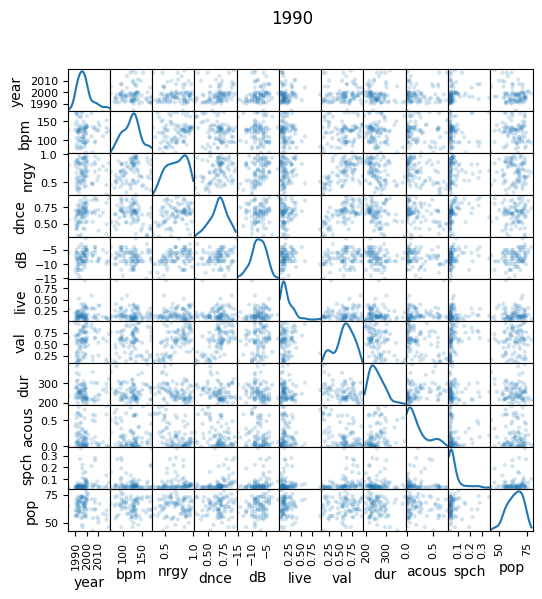

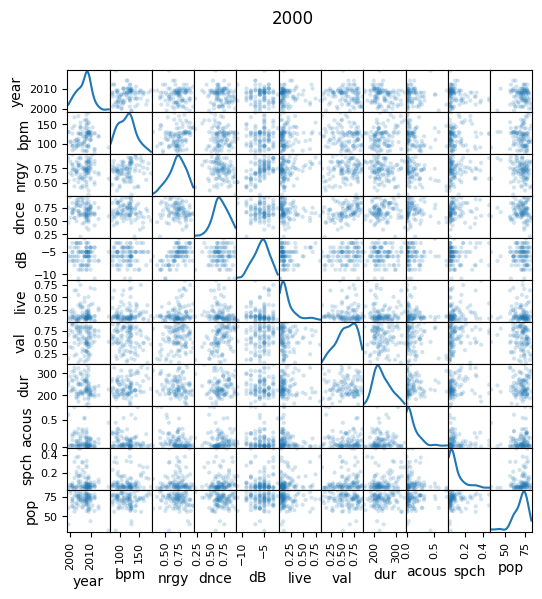

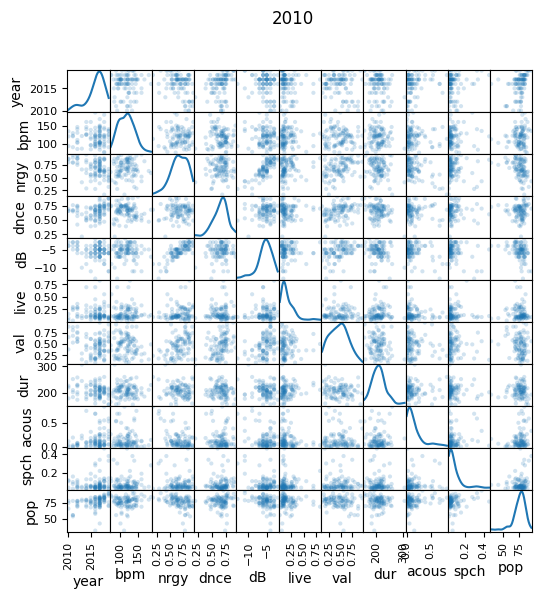

In [204]:
plt.style.use('default')
for decade in decades:
  scatter_matrix(eval("df"+decade).drop(columns='Number'), alpha=0.2, figsize=(6, 6),  diagonal="kde")
  plt.suptitle(decade)
  plt.show()

## Evolución de las variables en el tiempo

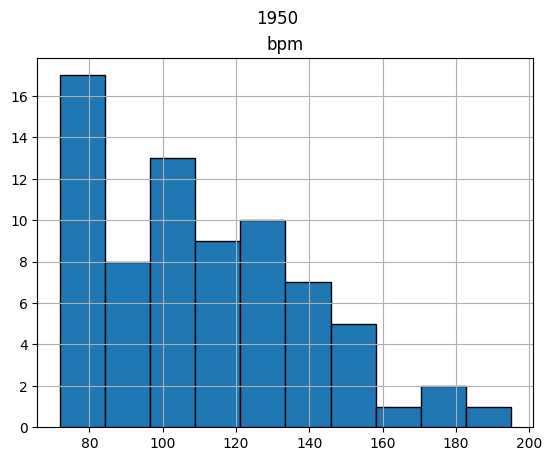

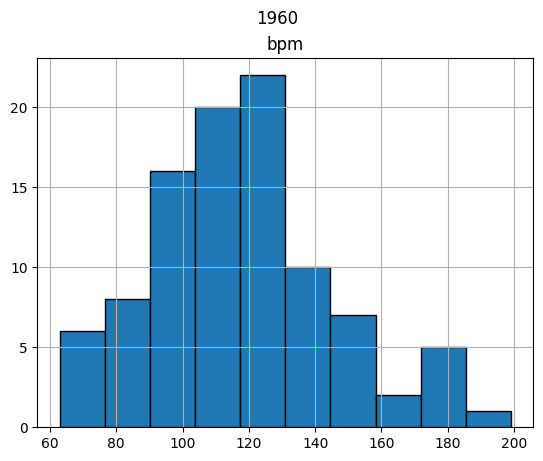

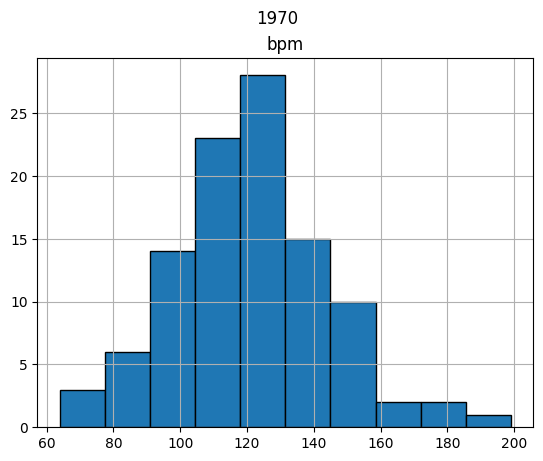

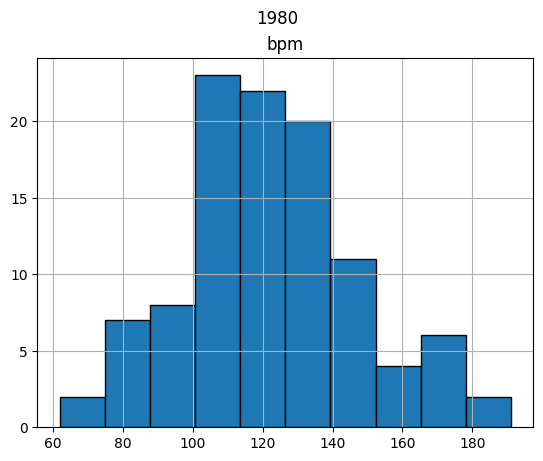

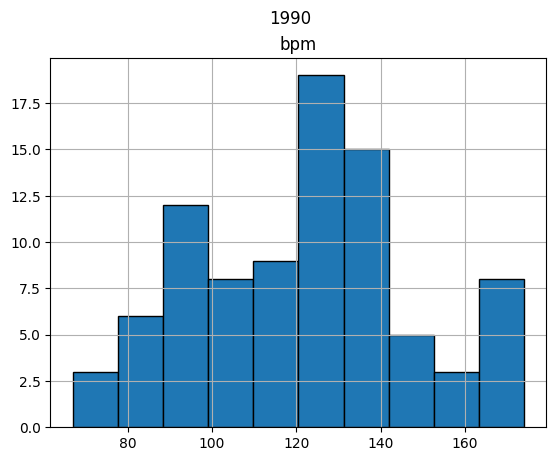

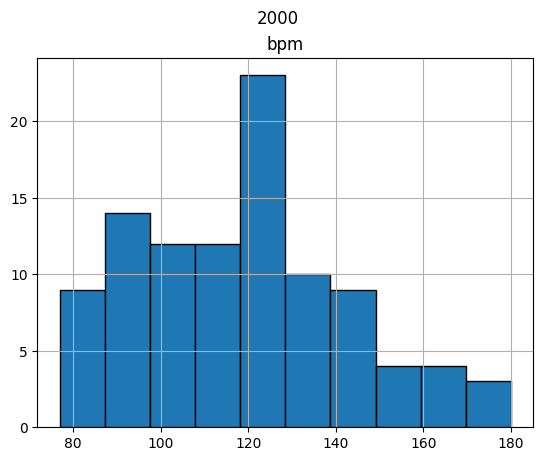

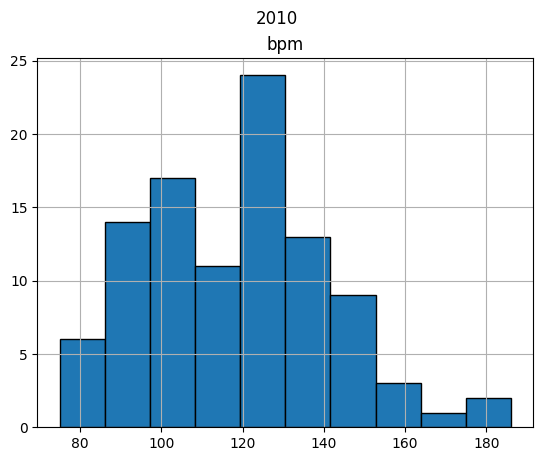

In [205]:
# Histogramas preliminares

bpm_mean_vals = []
bpm_st_devs = []
bpm_mode_vals = []

for decade in decades:
  #eval("df"+decade)['bpm'].plot.kde()
  eval("df"+decade).hist(column = 'bpm', edgecolor = 'black')
  bpm_mean_vals.append(eval("df"+decade)['bpm'].mean())
  bpm_mode_vals.append(eval("df"+decade)['bpm'].mode()[0]) # mode() devuelve varias modas, me quedo con la primera
  
  bpm_st_devs.append(eval("df"+decade)['bpm'].std())
  np.mean(eval("df"+decade)['bpm'])
  plt.suptitle(decade)
  plt.show()

In [206]:
def variable_plot(decades, variable, nombre_var):
  '''
  Grafica la media y moda de una variable a lo largo de las decádas.
  '''
  mean_vals = []
  mode_vals = []
  decades_list = [int(i) for i in decades]
  for decade in decades:
    mean_vals.append(eval("df"+decade)[variable].mean())
    mode_vals.append(eval("df"+decade)[variable].mode()[0]) # mode() devuelve varias modas, me quedo con la primera
  plt.plot(decades_list, mean_vals, color = 'darkred', label = 'Promedio')
  plt.plot(decades_list, mode_vals, color = 'darkblue', label = 'Moda')
  plt.ylabel(nombre_var)
  plt.xlabel("Década")
  plt.xticks(decades_list, ['50s', '60s', '70s', '80s', '90s', '2000s', '2010s'])
  plt.title(f"{nombre_var} a lo largo de las décadas")
  plt.legend()
  plt.show()

**bpm (tempo)**

Es el tempo global estimado de una pista en pulsaciones por minuto (BPM). En terminología musical, el tempo es la velocidad o el ritmo de una pieza determinada y se deriva directamente de la duración media del beat.

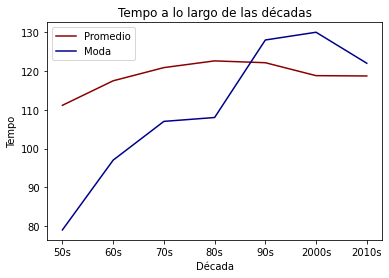

In [ ]:
variable_plot(decades, 'bpm', 'Tempo')

**Liveness**

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

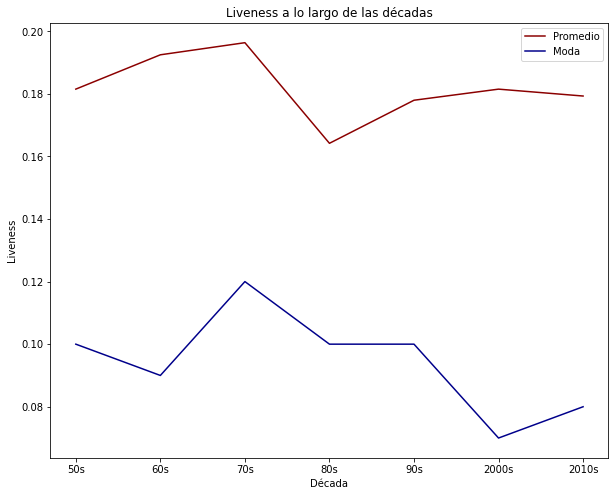

In [ ]:
variable_plot(decades, 'live', 'Liveness')

**Energía**

Representa una medida perceptual de intensidad y actividad. Por lo general, las pistas enérgicas se sienten rápidas, ruidosas y de intensidad alta. Por ejemplo, el death metal tiene mucha energía, mientras que un preludio de Bach tiene una puntuación baja en la escala. Las características de percepción que contribuyen a este atributo incluyen rango dinámico, volumen percibido, timbre, frecuencia de inicio y entropía general. 

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

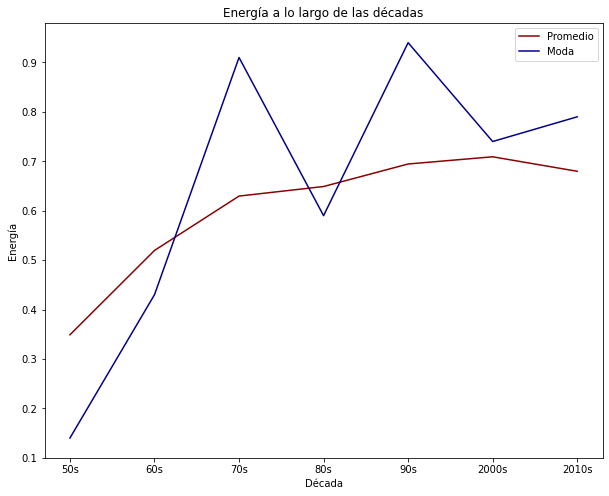

In [ ]:
variable_plot(decades, 'nrgy', 'Energía')

**Popularidad**

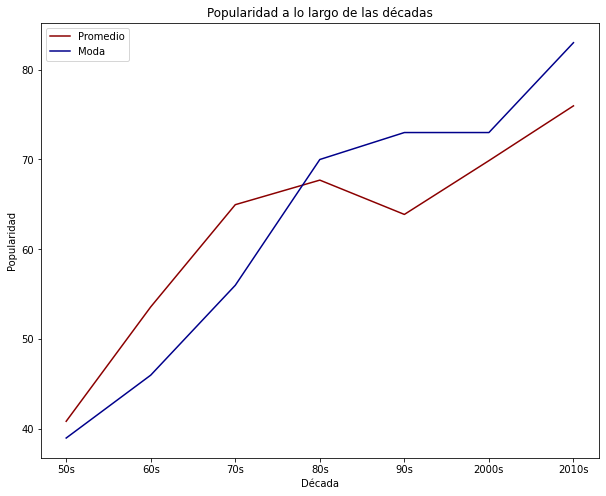

In [ ]:
variable_plot(decades, 'pop', 'Popularidad')

**Acousticness**

Es una medida de confianza acerca de si la pista es acústica. Valores más altos significan una alta confianza en que la pista sea acústica.

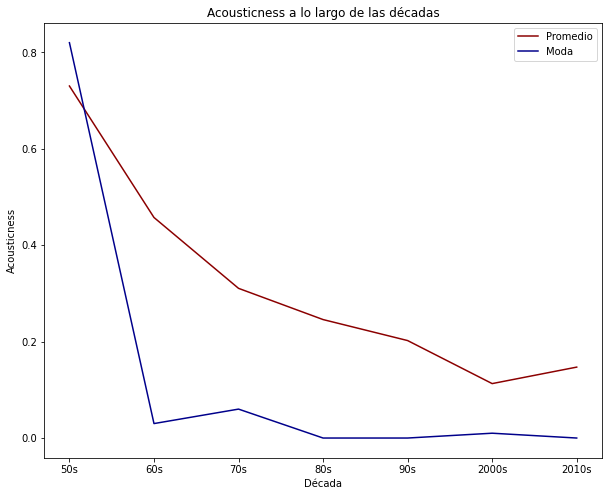

In [ ]:
variable_plot(decades, 'acous', 'Acousticness')

**Duración**


Duración de la canción en segundos.

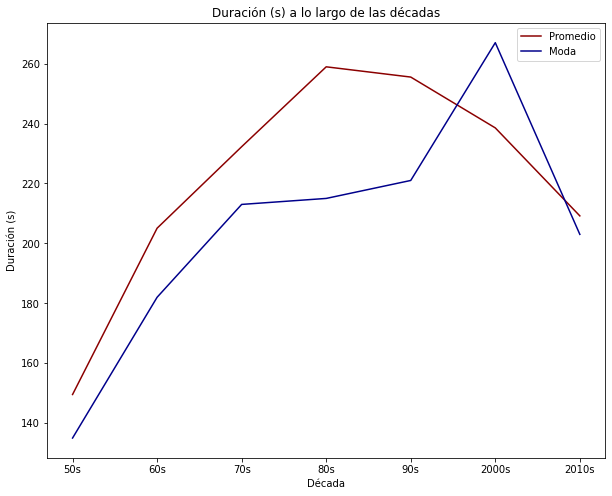

In [ ]:
variable_plot(decades, 'dur', 'Duración (s)')

**Danceability (bailabilidad)** 

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. 

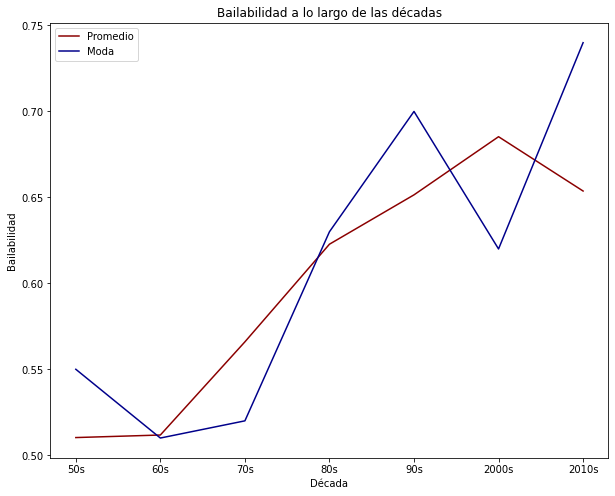

In [ ]:
variable_plot(decades, 'dnce', 'Bailabilidad')

**Loudness (dB)**


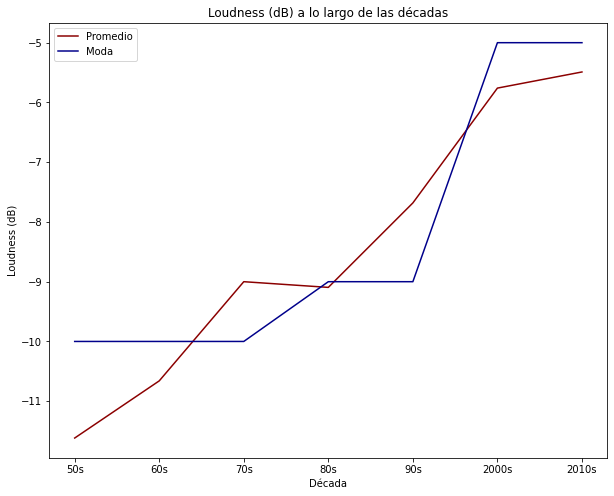

In [ ]:
variable_plot(decades, 'dB', 'Loudness (dB)')

**Speechiness**

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

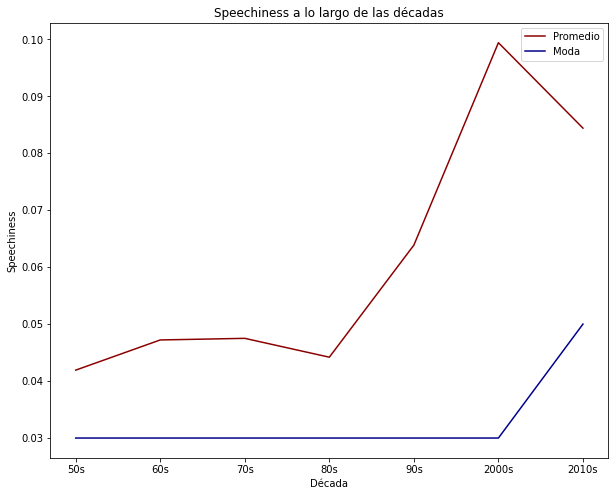

In [ ]:
variable_plot(decades, 'spch', 'Speechiness')

**Valence**

A measure describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

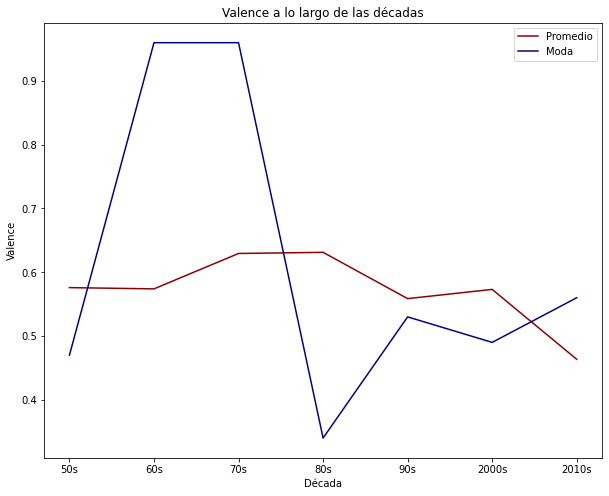

In [ ]:
variable_plot(decades, 'val', 'Valence')

Graficando todos los parámetros que toman valores entre 0 y 1 en simultáneo:

In [207]:
def mean_variable_plot(decades, variable, nombre_var):
  '''
  Grafica la media y moda de una variable a lo largo de las decádas.
  '''
  mean_vals = []
  decades_list = [int(i) for i in decades]
  for decade in decades:
    mean_vals.append(eval("df"+decade)[variable].mean())
  plt.plot(decades_list,  mean_vals, label = nombre_var, linewidth=4)

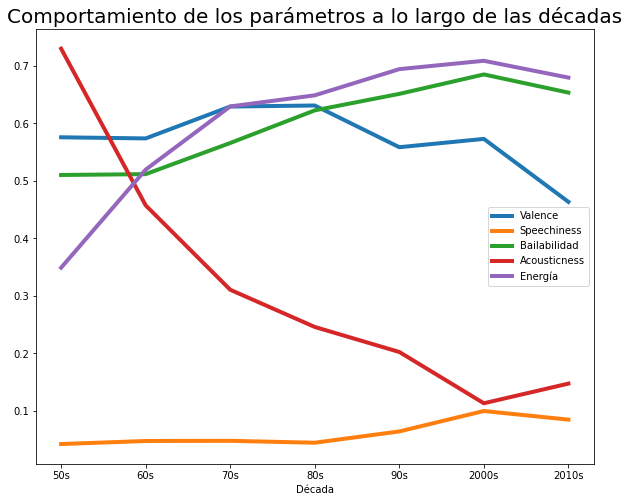

In [ ]:
decades_list = [int(i) for i in decades]

plt.rcParams["figure.figsize"] = (10,8)
mean_variable_plot(decades, 'val', 'Valence')
mean_variable_plot(decades, 'spch', 'Speechiness')
mean_variable_plot(decades, 'dnce', 'Bailabilidad')
mean_variable_plot(decades, 'acous', 'Acousticness')
#mean_variable_plot(decades, 'dB', 'Loudness (dB)')
#mean_variable_plot(decades, 'pop', 'Popularity')
#mean_variable_plot(decades, 'bpm', 'Tempo')
mean_variable_plot(decades, 'nrgy', 'Energía')
#mean_variable_plot(decades, 'dur', 'Duración (s)')

plt.xlabel("Década")
plt.xticks(decades_list, ['50s', '60s', '70s', '80s', '90s', '2000s', '2010s'])
plt.title(f"Comportamiento de los parámetros a lo largo de las décadas", fontsize=20)
plt.legend()
plt.show()

In [ ]:
Normalizando para poder graficar todas las variables en simutáneo para ver el comportamiento cualitativo (si crece o decrece):

In [ ]:
def scaled_variable_plot(decades, variable, nombre_var):
  '''
  Grafica la media y moda de una variable a lo largo de las decádas.
  '''
  mean_vals = []
  decades_list = [int(i) for i in decades]
  for decade in decades:
    mean_vals.append(eval("df"+decade)[variable].mean())
  plt.plot(decades_list, [(medias-min(mean_vals))/(max(mean_vals)-min(mean_vals)) for medias in mean_vals], label = nombre_var, linewidth=4)

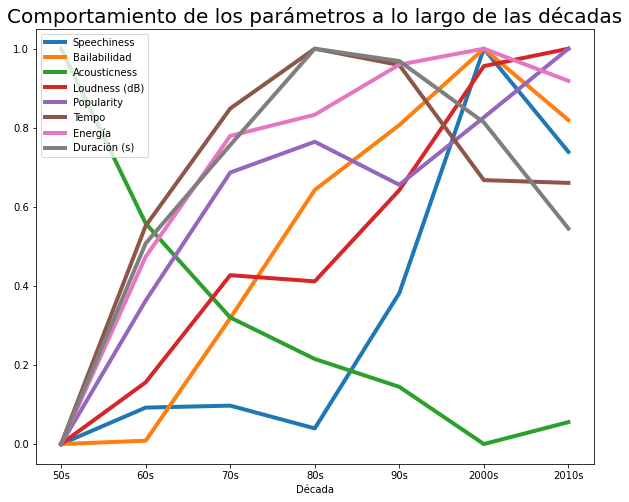

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)

#scaled_variable_plot(decades, 'val', 'Valence') comportamiento random, lo sacamos para facilitar la visualización
scaled_variable_plot(decades, 'spch', 'Speechiness')
scaled_variable_plot(decades, 'dnce', 'Bailabilidad')
scaled_variable_plot(decades, 'acous', 'Acousticness')
scaled_variable_plot(decades, 'dB', 'Loudness (dB)')
scaled_variable_plot(decades, 'pop', 'Popularity')
scaled_variable_plot(decades, 'bpm', 'Tempo')
scaled_variable_plot(decades, 'nrgy', 'Energía')
scaled_variable_plot(decades, 'dur', 'Duración (s)')

plt.xlabel("Década")
plt.xticks(decades_list, ['50s', '60s', '70s', '80s', '90s', '2000s', '2010s'])
plt.title(f"Comportamiento de los parámetros a lo largo de las décadas", fontsize=20)
plt.legend()
plt.show()

## Evolución de los géneros a través de las décadas (pre-datacuration)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

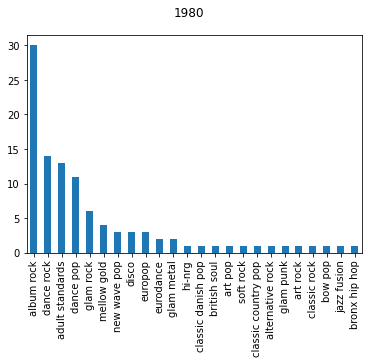

In [ ]:
# Para tener un grafico bonito y no pixelado
from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive')
eval("df1980")['top genre'].value_counts().plot(kind='bar')
plt.suptitle("1980")
plt.savefig('/content/gdrive/My Drive/histograma.png', bbox_inches = 'tight')
files.download('/content/gdrive/My Drive/histograma.png')
plt.show()

Estos son todos los géneros:

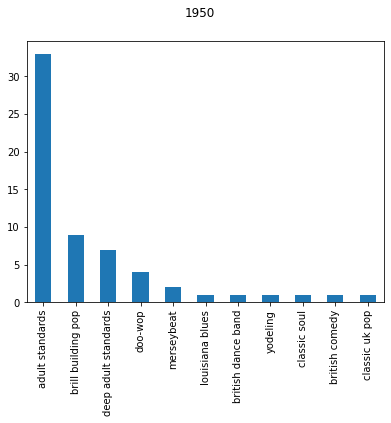

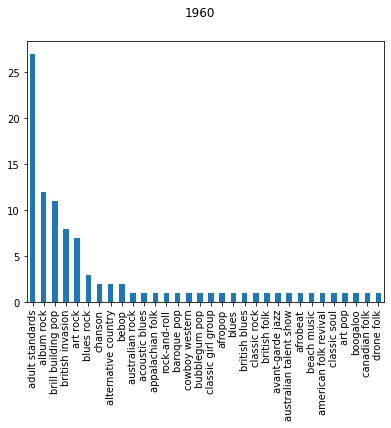

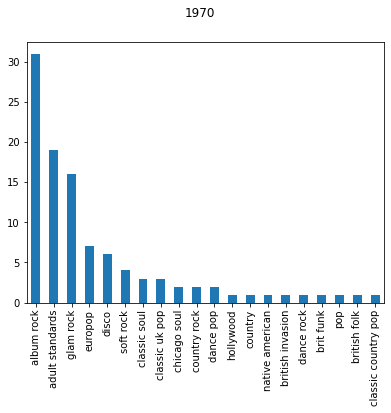

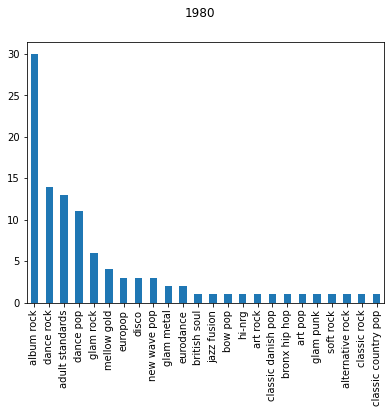

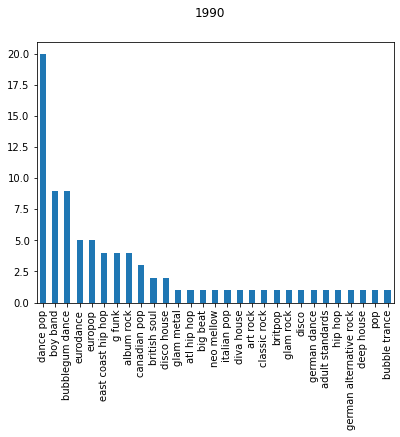

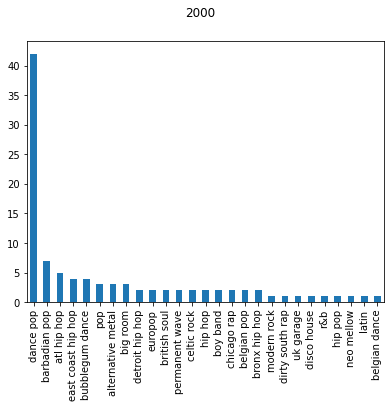

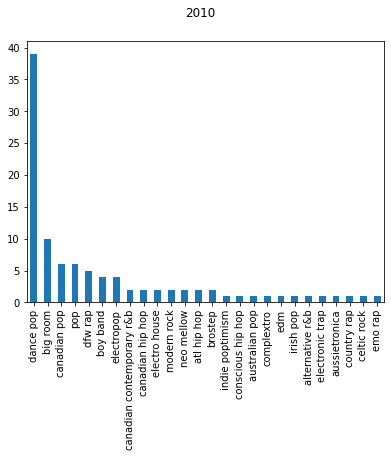

In [ ]:
plt.rcParams["figure.figsize"] = (6.4,4.8) #original size
for decade in decades:
  eval("df"+decade)['top genre'].value_counts().plot(kind='bar')
  plt.suptitle(decade)
  plt.show()

Para ver como es el set de datos anual de 1921 a 2020. 
No tiene la clasificación según el género, podríamos clasificarla utilizando como training set el set de décadas y luego ver la evolución temporal.

Add a decade column because "year" is not the year of the original song

In [226]:
for decade in decades:
  eval("df"+decade)['decade']= int(decade)

**merge datasets by decades into one data frame**

In [227]:
df_all_decades = pd.concat([df1950,df1960,df1970,df1980,df1990,df2000, df2010])
df_all_decades.tail()

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,decade
95,96,Stereo Hearts (feat. Adam Levine),Gym Class Heroes,dance pop,2011,90,0.80,0.65,-3,0.27,0.80,211,0.03,0.10,56,2010
96,97,Dynamite,Taio Cruz,dance pop,2011,120,0.79,0.76,-4,0.03,0.87,203,0.00,0.08,56,2010
97,98,Break Your Heart,Taio Cruz,dance pop,2011,122,0.89,0.67,-5,0.24,0.68,185,0.00,0.03,54,2010
98,99,Summer Air,ItaloBrothers,dance pop,2017,102,0.75,0.76,-4,0.08,0.49,184,0.06,0.07,43,2010
99,100,All I Wanna Do,Martin Jensen,big room,2016,112,0.79,0.73,-4,0.07,0.56,194,0.16,0.07,32,2010


Estos son todos los géneros:

In [228]:
all_genres = set(df_all_decades['top genre'])
all_genres

{'acoustic blues',
 'adult standards',
 'afrobeat',
 'afropop',
 'album rock',
 'alternative country',
 'alternative metal',
 'alternative r&b',
 'alternative rock',
 'american folk revival',
 'appalachian folk',
 'art pop',
 'art rock',
 'atl hip hop',
 'aussietronica',
 'australian pop',
 'australian rock',
 'australian talent show',
 'avant-garde jazz',
 'barbadian pop',
 'baroque pop',
 'beach music',
 'bebop',
 'belgian dance',
 'belgian pop',
 'big beat',
 'big room',
 'blues',
 'blues rock',
 'boogaloo',
 'bow pop',
 'boy band',
 'brill building pop',
 'brit funk',
 'british blues',
 'british comedy',
 'british dance band',
 'british folk',
 'british invasion',
 'british soul',
 'britpop',
 'bronx hip hop',
 'brostep',
 'bubble trance',
 'bubblegum dance',
 'bubblegum pop',
 'canadian contemporary r&b',
 'canadian folk',
 'canadian hip hop',
 'canadian pop',
 'celtic rock',
 'chanson',
 'chicago rap',
 'chicago soul',
 'classic country pop',
 'classic danish pop',
 'classic girl

In [229]:
#Remove nan
df_all_decades_filter = df_all_decades.dropna(subset = ['top genre'])

## Standarization of genres: all pop, all hip hop, ...

In [230]:
# Para sacar el warning de operaciones en cadena
pd.options.mode.chained_assignment = None  # default='warn' 

In [231]:
#blues
df_all_decades_filter.loc[df_all_decades_filter['top genre'].str.contains('blues'), 'top genre'] = 'blues'

#pop
df_all_decades_filter['top genre'].replace(dict.fromkeys(['italian pop', 'irish pop', 'canadian pop', 'australian pop', 'barbadian pop', 
                                                          'bubblegum pop', 'bubblegum dance', 'belgian pop', 'classic uk pop', 'europop',
                                                          'hollywood', 'bow pop', 'art pop', 'indie poptimism', 'brill building pop',
                                                          'classic danish pop', 'new wave pop', 'british comedy', 'merseybeat', 
                                                          'british dance band', 'yodeling', 'chanson'],
                                                          'pop'), inplace=True)


df_all_decades_filter.loc[df_all_decades_filter['top genre'].str.contains('boy band'), 'top genre'] = 'dance pop'


#hip hop

# Creo que rap y hip hop refieren a lo mismo. Rap es el estilo de cantar, hip hop la musica/cultura
df_all_decades_filter.loc[df_all_decades_filter['top genre'].str.contains('hip hop'), 'top genre'] = 'hip hop'
df_all_decades_filter.loc[df_all_decades_filter['top genre'].str.contains('rap'), 'top genre'] = 'hip hop'

#(dejo este porque quedaron algunos sin considerar en la limpieza del renglón anterior)
df_all_decades_filter['top genre'].replace(dict.fromkeys(['bronx hip hop', 'canadian hip hop', 'conscious hip hop', 'detroit hip hop',
                                                          'east coast hip hop', 'atl hip hip', 'g funk','dfw rap', 'chicago rap', 
                                                          'dirty south rap', 'emo rap', 'hip pop', 'baroque pop'], 
                                                          'hip hop'), inplace=True)


# electronic
df_all_decades_filter['top genre'].replace(dict.fromkeys(['brostep', 'bubble trance', 'complextro', 'deep house', 
                                                          'edm', 'electro house', 'electropop', 'aussietronica', 
                                                          'uk garage', 'big room', 'big beat', 'eurodance', 'diva house',
                                                          'disco house', 'belgian dance', 'hi-nrg', 'german dance'],
                                                          'electronic'), inplace=True)
# rock
df_all_decades_filter['top genre'].replace(dict.fromkeys(['album rock', 'australian rock', 'blues rock', 'glam rock', 'mellow gold',
                                                          'soft rock', 'rock-and-roll', 'classic rock', 'british invasion',
                                                          'australian talent show', 'permanent wave', 'art rock', 'neo mellow'],
                                                          'rock'), inplace=True)
df_all_decades_filter.loc[df_all_decades_filter['top genre'].str.contains('glam'), 'top genre'] = 'rock'

# soul
df_all_decades_filter['top genre'].replace(dict.fromkeys(['chicago soul', 'british soul', 'classic soul', 'classic girl group'],
                                                          'soul'), inplace=True)
# jazz
df_all_decades_filter['top genre'].replace(dict.fromkeys(['bebop', 'avant-garde jazz', 'jazz fusion', 'afropop'],
                                                          'jazz'), inplace=True)
# r&b
df_all_decades_filter['top genre'].replace(dict.fromkeys(['canadian contemporary r&b', 'alternative r&b', 'beach music', 'doo wop',
                                                          'doo-wop', 'boogaloo'],
                                                          'r&b'), inplace=True)

# folk refiere a la musica folklorica de un pais, y en yankilandia su folklore es el country. Para mi los podriamos unir en "folk"
df_all_decades_filter.loc[df_all_decades_filter['top genre'].str.contains('folk'), 'top genre'] = 'folk'
#df_all_decades_filter['top genre'].replace(dict.fromkeys(['american folk revival', 'appalachian folk', 'british folk', 'canadian folk'],
#                                                          'folk'), inplace=True)

# country
df_all_decades_filter['top genre'].replace(dict.fromkeys(['alternative country', 'country rap', 'classic country pop', 'country rock', 'cowboy western'],
                                                         'folk'), inplace=True)
# funk
df_all_decades_filter['top genre'].replace(dict.fromkeys(['native american', 'brit funk', 'afrobeat'],
                                                         'funk'), inplace=True)

# alternative rock
df_all_decades_filter['top genre'].replace(dict.fromkeys(['britpop', 'german alternative rock', 'modern rock', 'celtic rock'],
                                                          'alternative rock'), inplace=True)
df_all_decades_filter.loc[df_all_decades_filter['top genre'].str.contains('alternative'), 'top genre'] = 'alternative rock'


# Para corregir los que se llaman "adult standards" 
df_all_decades_filter.loc[df_all_decades_filter['top genre'].str.contains('adult standards'), 'top genre'] = 'adult standards'

In [232]:
# Los géneros que quedan después de la limpieza
set(df_all_decades_filter['top genre'])

{'adult standards',
 'alternative rock',
 'blues',
 'country',
 'dance pop',
 'dance rock',
 'disco',
 'electronic',
 'folk',
 'funk',
 'hip hop',
 'jazz',
 'latin',
 'pop',
 'r&b',
 'rock',
 'soul'}

In [233]:
# Para tener una idea de qué artistas son:
set(df_all_decades_filter[df_all_decades_filter['top genre']=='adult standards']['artist'])

{'Al Martino',
 'Ambrosia',
 'Barbra Streisand',
 'Barry Manilow',
 'Bee Gees',
 'Billy Eckstine',
 'Billy Fury',
 'Bobby Goldsboro',
 'Bobby Vee',
 'Bread',
 'Brian Hyland',
 'Buddy Holly',
 'Carpenters',
 'Chicago',
 'Christopher Cross',
 'Commodores',
 'Connie Francis',
 'David Whitfield',
 'Dean Martin',
 'Diana Ross',
 'Dion & The Belmonts',
 'Dionne Warwick',
 'Doris Day',
 'Duke Ellington',
 'Ella Fitzgerald',
 'Elvis Presley',
 'England Dan',
 'Eric Carmen',
 'Four Tops',
 'Frank Sinatra',
 'Frankie Valli',
 'Frankie Valli & The Four Seasons',
 'Gary Lewis & The Playboys',
 'Gary Puckett & The Union Gap',
 'Gerry & The Pacemakers',
 'Gladys Knight & The Pips',
 'Helen Shapiro',
 'James Darren',
 'Jimmy Young',
 'John Denver',
 'Johnny Tillotson',
 'Leo Sayer',
 'Lionel Richie',
 'Louis Prima',
 'Michael Bolton',
 'Nat King Cole',
 'Neil Diamond',
 'Neil Sedaka',
 'Pat Boone',
 'Patsy Cline',
 'Patti Austin',
 'Paul Anka',
 'Peabo Bryson',
 'Peter Cetera',
 'Ricky Nelson',
 'Rod

In [234]:
# Corrijo estos a mano porque conozco qué género les corresponde
df_all_decades_filter.loc[df_all_decades_filter['artist'].str.contains('Bee Gees'), 'top genre'] = 'disco'
df_all_decades_filter.loc[df_all_decades_filter['artist'].str.contains('Barbra Streisand'), 'top genre'] = 'pop'
df_all_decades_filter.loc[df_all_decades_filter['artist'].str.contains('Diana Ross'), 'top genre'] = 'soul'

In [235]:
df_genre

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.000598,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.000000
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.000000
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.000000
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.081132,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.000000
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.001350,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,82447,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,78,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.391651,0.001350,0.435089,0.001350,0.001350,0.001350,0.065664,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,obscene,0.014286
28368,82448,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,67,0.001284,0.001284,0.035338,0.001284,0.001284,0.001284,0.066324,0.203889,0.318910,0.058152,0.134955,0.001284,0.001284,0.040811,0.001284,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,obscene,0.014286
28369,82449,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,77,0.001504,0.154302,0.168988,0.001504,0.039755,0.001504,0.035401,0.001504,0.356685,0.001504,0.068684,0.001504,0.001504,0.001504,0.001504,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,obscene,0.014286
28370,82450,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,67,0.001196,0.001196,0.001196,0.001196,0.048359,0.001196,0.001196,0.001196,0.492434,0.103614,0.001196,0.202659,0.001196,0.070867,0.001196,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,obscene,0.014286


In [236]:
artists_to_fix = set(df_all_decades_filter[df_all_decades_filter['top genre']=='adult standards']['artist'])
artists_genres = {}
for artist in artists_to_fix:
  artists_genres[artist] = df_genre[df_genre['artist_name'] == artist.lower()]['genre'].mode()

In [237]:
artists_to_fix = set(df_all_decades_filter[df_all_decades_filter['top genre']=='adult standards']['artist'])
artists_genres = {}
for artist in artists_to_fix:
  artists_genres[artist] = df_genre[df_genre['artist_name'] == artist.lower()]['genre'].mode()

for artist in artists_to_fix:
  try:
    genre = artists_genres[artist][0]
    df_all_decades_filter.loc[df_all_decades_filter['artist'].str.contains(artist), 'top genre'] = str(genre)
  except:
    continue

In [238]:
# Veamos si el otro dataset tenía a todos los artistas que nos faltaba etiquetar
set(df_all_decades_filter[df_all_decades_filter['top genre']=='adult standards']['artist'])

{'Bobby Goldsboro',
 'David Whitfield',
 'Frank Sinatra',
 'James Darren',
 'Jimmy Young',
 'Rusty Draper',
 'Tab Hunter',
 'Teresa Brewer',
 'The Hilltoppers',
 'Tommy Edwards',
 'Tommy Roe'}

In [239]:
# No, se ve que la tortura no termina. Lo terminamos manualmente entonces
#Arreglado! al fin!! (CREO...jaja)
still_not_fixed = set(df_all_decades_filter[df_all_decades_filter['top genre']=='adult standards']['artist'])
genres = ['folk', 'pop', 'jazz', 'pop', 'pop', 'folk', 'pop', 'pop', 'pop', 'r&b', 'pop']

for artist, genre in zip(list(still_not_fixed), genres):
  # Tuve que correr esta celda 3 VECES para que funcione bien
  # Puede ser que solamente haga lo que le dije en la primer linea que encuentra?
  # No se, me rindo
  try:
    df_all_decades_filter.loc[df_all_decades_filter['artist'].str.contains(artist), 'top genre'] = genre
  except:
    continue

In [240]:
still_not_fixed = set(df_all_decades_filter[df_all_decades_filter['top genre']=='adult standards']['artist'])
still_not_fixed

set()

## Evolución de los géneros a través de las décadas (post-datacuration)

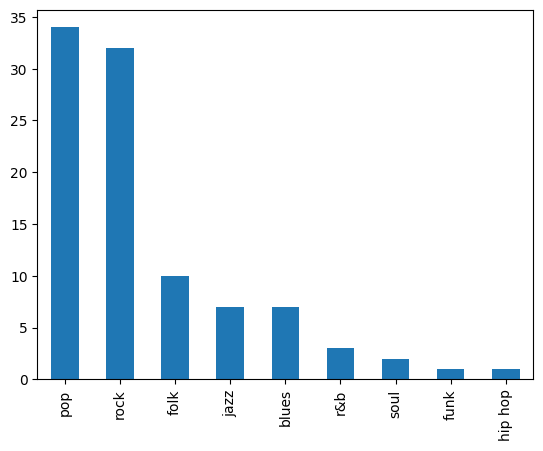

In [245]:
df_all_decades_filter[df_all_decades_filter['decade']==1960]['top genre'].value_counts().plot(kind='bar')

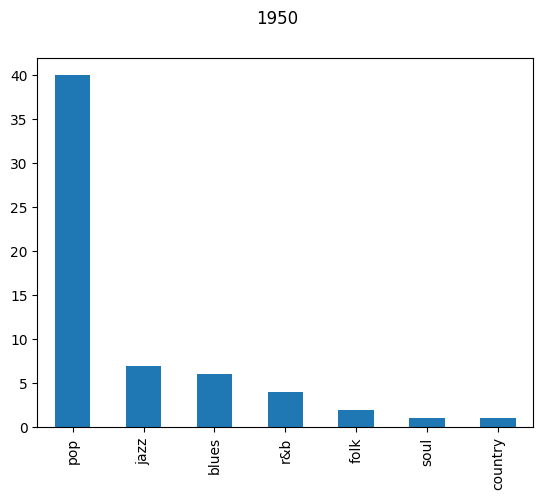

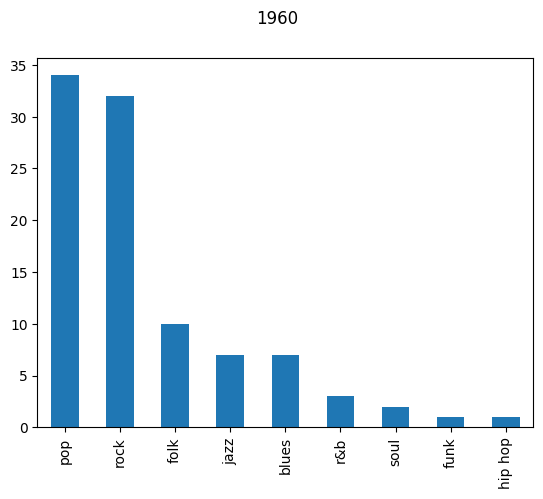

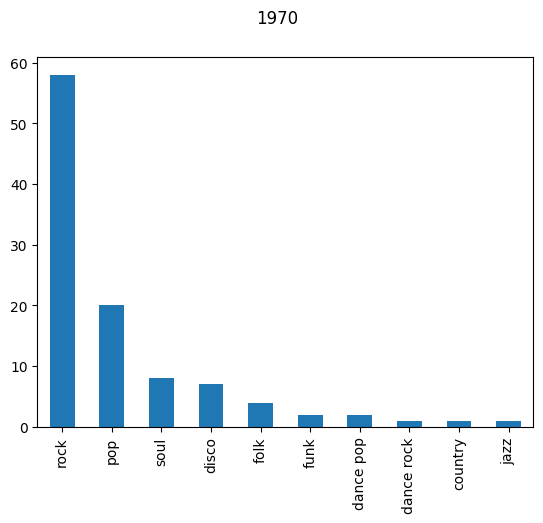

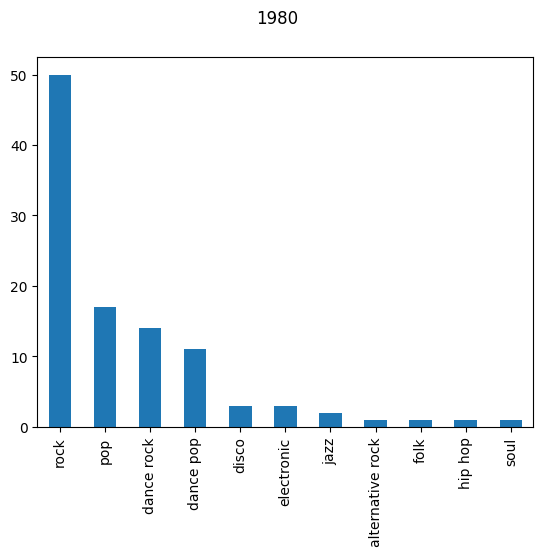

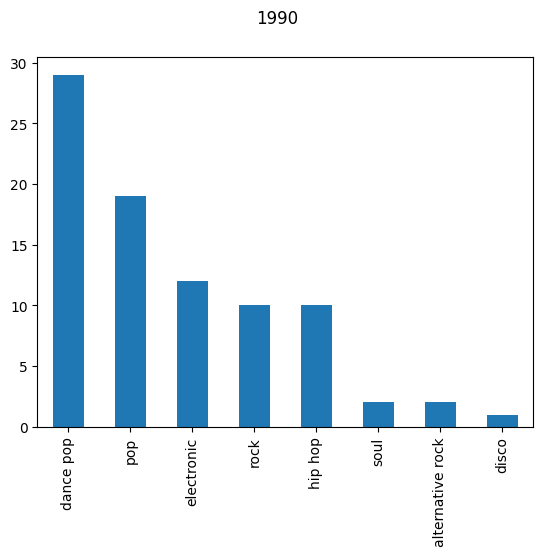

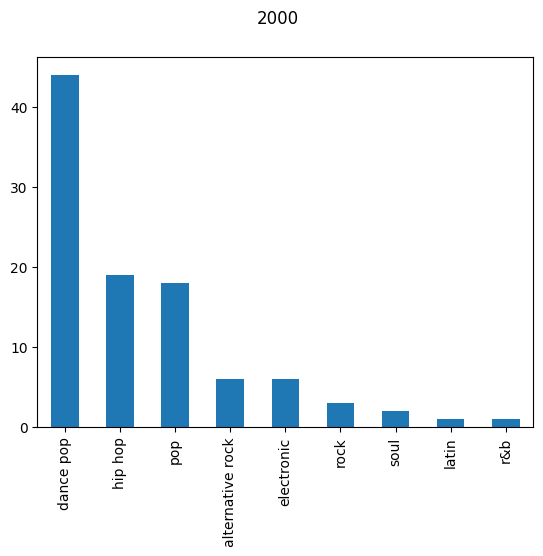

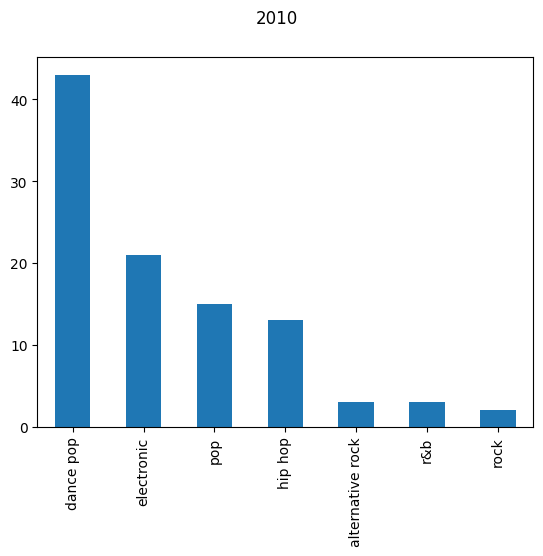

In [244]:
plt.rcParams["figure.figsize"] = (6.4,4.8) #original size

generos_counts = []
for decade in decades:
  df_all_decades_filter[df_all_decades_filter['decade']== int(decade)]['top genre'].value_counts().plot(kind='bar')
  generos_counts.append(df_all_decades_filter[df_all_decades_filter['decade']== int(decade)]['top genre'].value_counts(normalize=True))
  plt.suptitle(decade)
  plt.show()

In [246]:
def frecuencia_genero(genero):
  genero_frec = []
  for i in range(len(decades)):
    try:
      genero_frec.append(generos_counts[i][genero])
    except KeyError:
      genero_frec.append(0)
  plt.plot(decades_list, genero_frec, label = genero, linewidth=2)

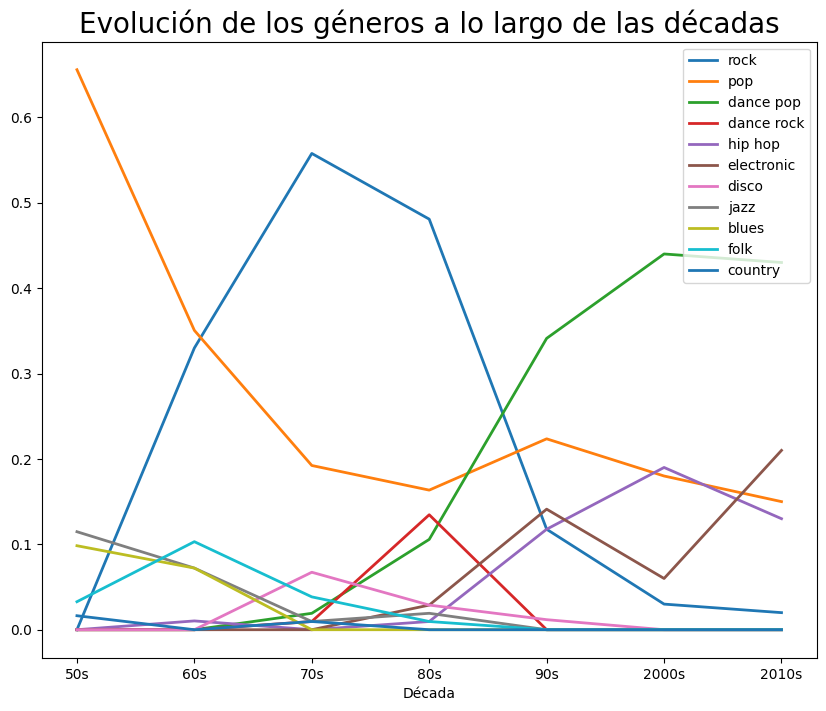

In [247]:
plt.rcParams["figure.figsize"] = (10,8)

frecuencia_genero('rock')
frecuencia_genero('pop')
frecuencia_genero('dance pop')
frecuencia_genero('dance rock')
frecuencia_genero('hip hop')
frecuencia_genero('electronic')
frecuencia_genero('disco')
frecuencia_genero('jazz')
frecuencia_genero('blues')
frecuencia_genero('folk')
frecuencia_genero('country')


plt.xlabel("Década")
plt.xticks(decades_list, ['50s', '60s', '70s', '80s', '90s', '2000s', '2010s'])
plt.title(f"Evolución de los géneros a lo largo de las décadas", fontsize=20)
plt.legend()
plt.show()

## Matriz de correlación

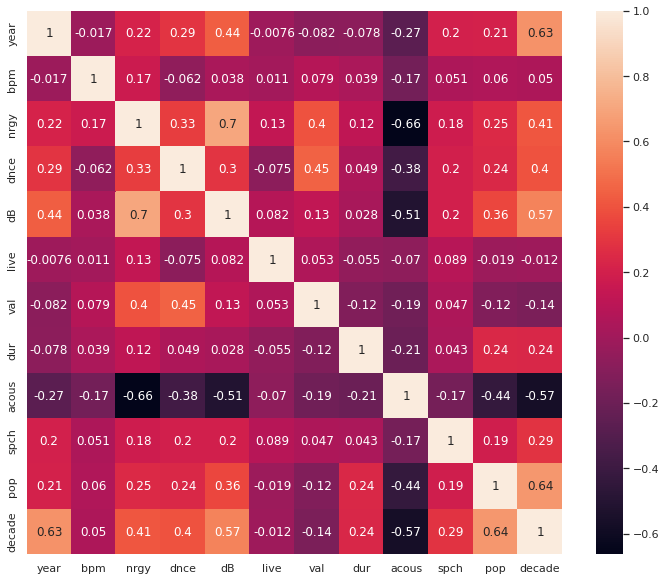

In [ ]:
corr_matrix = df_all_decades_filter.corr()
sns.set(rc = {'figure.figsize':(12,10)})
corr_matrix = corr_matrix.drop(['Number']).drop(['Number'],axis=1)
sns.heatmap(corr_matrix, annot=True)

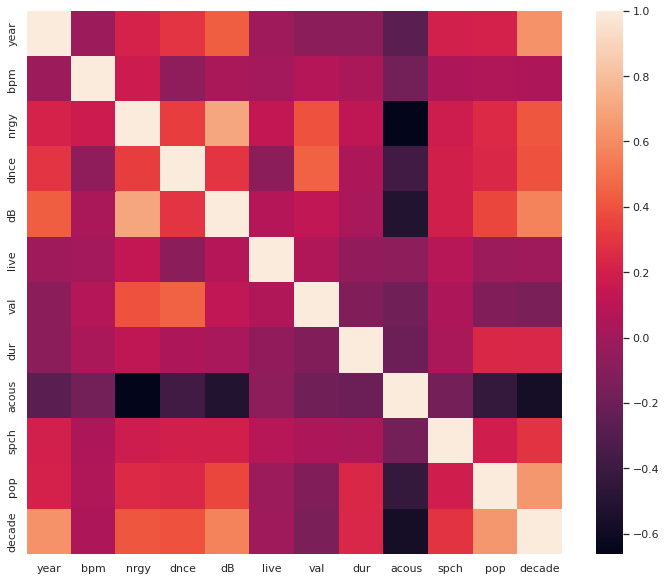

In [ ]:
# sin coef correlación
sns.heatmap(corr_matrix)

In [ ]:
genres_plot = ['rock', 'pop', 'electronic']
df_all_decades_filter['top genre'].value_counts()


rock                131
dance pop           114
pop                  98
adult standards      60
hip hop              44
electronic           36
dance rock           15
soul                 12
disco                10
art rock              9
country               8
blues                 6
folk                  6
r&b                   5
jazz                  4
neo mellow            4
metal                 3
alternative rock      3
disco house           3
celtic rock           3
new wave pop          3
permanent wave        2
chanson               2
german dance          1
afrobeat              1
hi-nrg                1
native american       1
afropop               1
latin                 1
boogaloo              1
brit funk             1
belgian dance         1
Name: top genre, dtype: int64

# 1921-2020 dataset

In [ ]:
df1921_2020.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.443,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.306,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.385,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.270,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.539,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.153,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.761,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.472,2020
169908,0.1090,['Ingrid Andress'],0.512,214787,0.428,0,60RFlt48hm0l4Fu0JoccOl,0.000000,0,0.1050,-7.387,1,More Hearts Than Mine,65,2020-03-27,0.0271,80.588,0.366,2020


In [ ]:
df1921_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

## Matriz de correlación

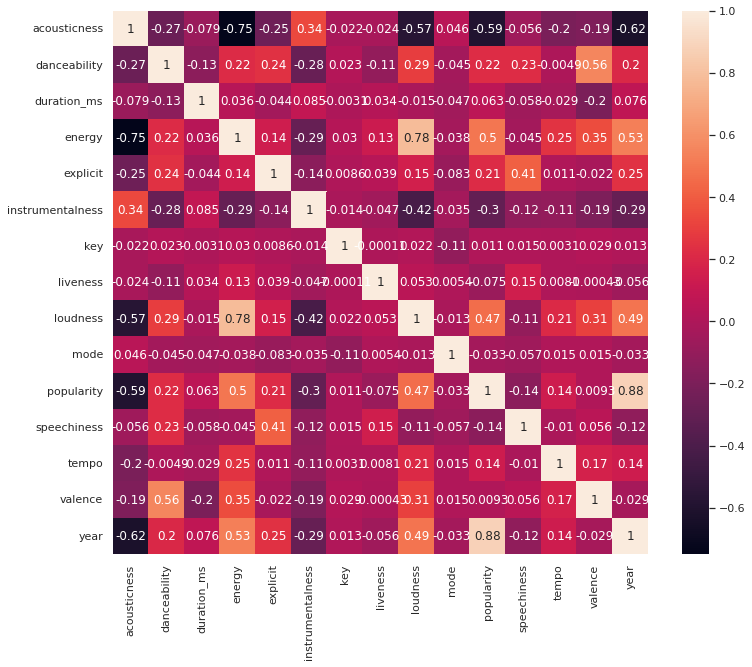

In [ ]:
corr_matrix_1921_2020 = df1921_2020.corr()
sns.heatmap(corr_matrix_1921_2020, annot=True)

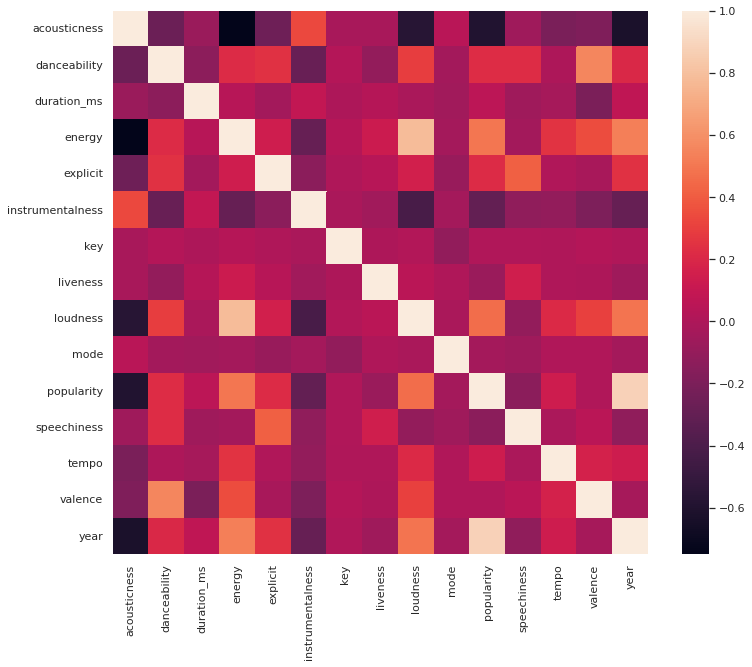

In [ ]:
sns.heatmap(corr_matrix_1921_2020)

# Genre dataset

Para clasificar

In [ ]:
df_genre.tail()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
28367,82447,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,78,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.391651,0.001350,0.435089,0.001350,0.001350,0.001350,0.065664,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,obscene,0.014286
28368,82448,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,67,0.001284,0.001284,0.035338,0.001284,0.001284,0.001284,0.066324,0.203889,0.318910,0.058152,0.134955,0.001284,0.001284,0.040811,0.001284,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,obscene,0.014286
28369,82449,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,77,0.001504,0.154302,0.168988,0.001504,0.039755,0.001504,0.035401,0.001504,0.356685,0.001504,0.068684,0.001504,0.001504,0.001504,0.001504,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,obscene,0.014286
28370,82450,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,67,0.001196,0.001196,0.001196,0.001196,0.048359,0.001196,0.001196,0.001196,0.492434,0.103614,0.001196,0.202659,0.001196,0.070867,0.001196,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,obscene,0.014286
28371,82451,jeezy,r.i.p.,2019,hip hop,remix killer alive remix thriller trap bitch s...,83,0.001012,0.075202,0.001012,0.001012,0.001012,0.001012,0.001012,0.001012,0.754444,0.046284,0.001012,0.001012,0.001012,0.001012,0.001012,0.033995,0.828875,0.674794,0.015862,0.000000,0.475474,0.492477,obscene,0.014286


In [ ]:
set(df_genre['genre'])

{'blues', 'country', 'hip hop', 'jazz', 'pop', 'reggae', 'rock'}

number of songs per year:

2019 1950


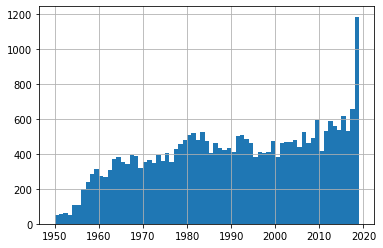

In [ ]:
print(max(df_genre['release_date']),min(df_genre['release_date']))
df_genre['release_date'].hist(bins=(2019-1950))


# To-do's
* Limpiar los datos
* frecuencia vs. tiempo por género
* tempo y variabilidad tempo

* Clasificar mejor los viejos
* Clasificador géneros
* Top artistas
* Correlaciones (OK)